# Decision Trees

In [1]:
# See binary_classification.py
from binary_classification import *

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

In [3]:
# Load pickled data
df = pd.read_pickle("data/yelp_df_final.pkl")

# Split data
train_df = df[df["dataset"] == "train"]
valid_df = df[df["dataset"] == "val"].reset_index(drop = True)

In [4]:
# Parameters excluded from predictions
exclude = ["review_id", 
           "business_id", 
           "user_id", 
           "label", 
           "date", 
           "categories", 
           "is_open",
           "postal_code", 
           "dataset"]

# Predictors
predictors = list(train_df.columns)
for col in exclude:   
    predictors.remove(col)

# Label
outcome = "label"

## Cross-Validation

Tune decision tree classifier hyperparameter maximum tree depth with accuracy on validation data

In [5]:
def dt_grid_search(train_df,
                   valid_df, 
                   predictors, 
                   outcome,
                   depths, 
                   measure = "Accuracy"):
    '''
    Execute grid search over decision tree classifier hyperparamter
    max depth
    '''
    
    # Initialize results
    result = []
    
    # Store best model
    best_model = None
    best_acc = 0

    # Grid search over depths
    for d in depths:

        # Initialize class instance
        dt = DecisionTree(train_data = train_df,
                       valid_data = valid_df,
                       test_data = None,
                       predictors = predictors,
                       outcome = outcome)

        # Train model
        dt.train(criterion = "entropy",
                 max_depth = d)

        # Save trained model object to pickle
        pickle_out = open("results/model_dt_{}.pkl".format(d), "wb")
        pickle.dump(dt.model, pickle_out)
        pickle_out.close()

        # Compute accuracy 
        dt.compute_prob(prob_set = "Valid")
        acc = dt.performance_metric(prob_set = "Valid",
                                    measure = measure)
        
        # Update best model
        if acc > best_acc:
            best_acc = acc
            best_model = dt.model

        # Record result
        result.append(acc)
        print("Depth: {}, Validation Accuracy: {:.2f}".format(d, acc))
        
    return best_model, result

In [6]:
# Depths to search over 
depths = list(range(1, 20))

In [7]:
# Execute grid search
best_dt, accs = dt_grid_search(train_df,
                               valid_df, 
                               predictors, 
                               outcome, 
                               depths,
                               "Accuracy")

Time to train: 41.44
Depth: 1, Validation Accuracy: 0.69
Time to train: 61.14
Depth: 2, Validation Accuracy: 0.69
Time to train: 77.84
Depth: 3, Validation Accuracy: 0.74
Time to train: 124.52
Depth: 4, Validation Accuracy: 0.74
Time to train: 127.58
Depth: 5, Validation Accuracy: 0.74
Time to train: 170.50
Depth: 6, Validation Accuracy: 0.75
Time to train: 186.27
Depth: 7, Validation Accuracy: 0.75
Time to train: 222.72
Depth: 8, Validation Accuracy: 0.75
Time to train: 216.15
Depth: 9, Validation Accuracy: 0.76
Time to train: 246.12
Depth: 10, Validation Accuracy: 0.76
Time to train: 275.88
Depth: 11, Validation Accuracy: 0.76
Time to train: 307.99
Depth: 12, Validation Accuracy: 0.76
Time to train: 314.79
Depth: 13, Validation Accuracy: 0.76
Time to train: 338.02
Depth: 14, Validation Accuracy: 0.76
Time to train: 344.62
Depth: 15, Validation Accuracy: 0.76
Time to train: 358.02
Depth: 16, Validation Accuracy: 0.76
Time to train: 318.30
Depth: 17, Validation Accuracy: 0.76
Time to t

In [8]:
# Save best model
pickle_out = open("results/model_dt_best.pkl", "wb")
pickle.dump(best_dt, pickle_out)
pickle_out.close()

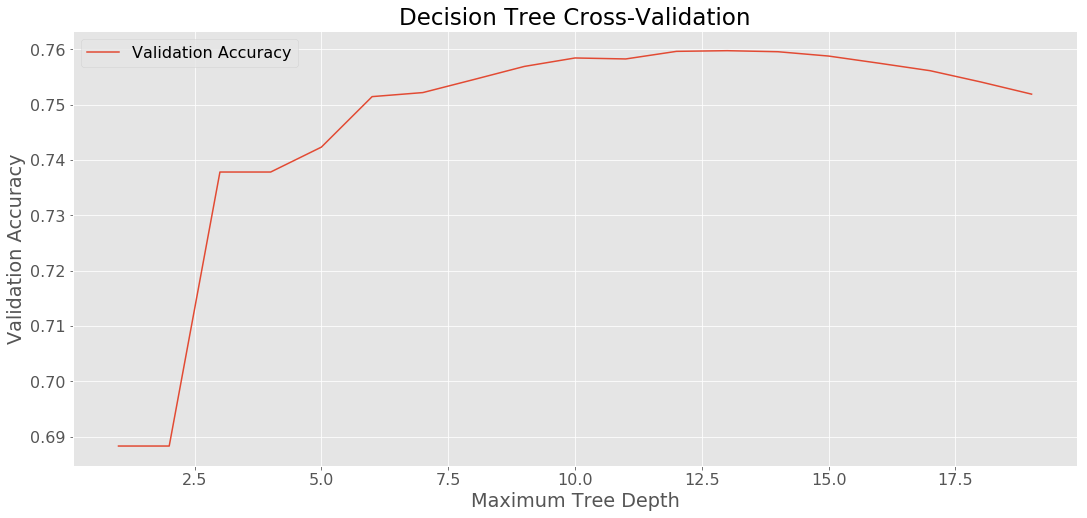

In [10]:
# Plot accuracy vs depth
fig = plt.figure(figsize=(18, 8))
plt.plot(depths, accs, label = "Validation Accuracy")

plt.xlabel("Maximum Tree Depth")
plt.ylabel("Validation Accuracy")
plt.title("Decision Tree Cross-Validation")
plt.legend()
plt.savefig("dt_cv.png")

In [13]:
idx = accs.index(max(accs))
print("Best depth: {}".format(depths[idx]))

Best depth: 13
